<a href="https://colab.research.google.com/github/ghanendrapiplani/ml_projects/blob/master/life_expectancy_countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/drive/My Drive/Life_Expectancy_Data.csv")
df = df.fillna(df.mean())
df = df.replace(to_replace ="Developing", value = 0)
df = df.replace(to_replace ="Developed", value = 1)
df.pop('Country')
print(df.columns)

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


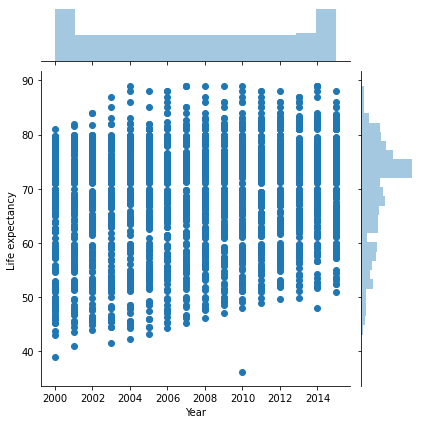

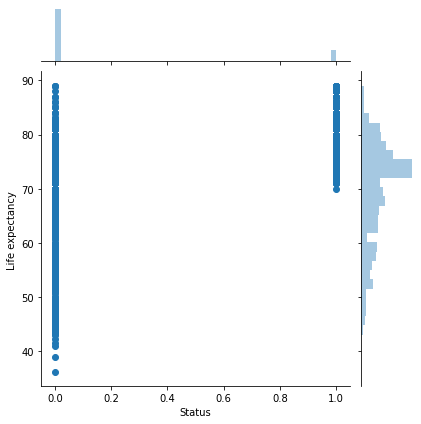

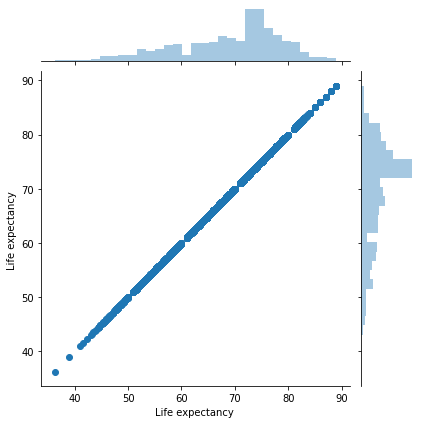

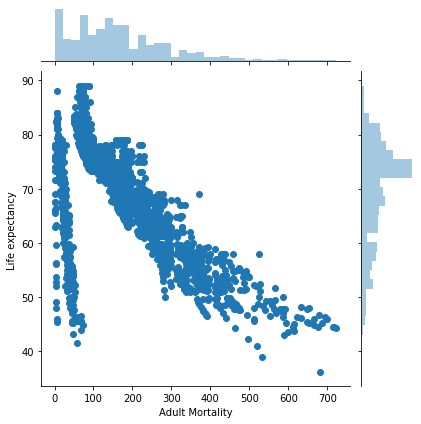

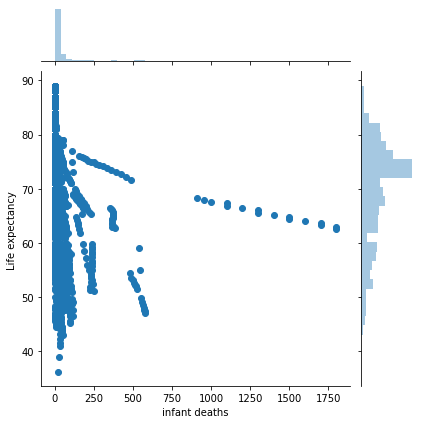

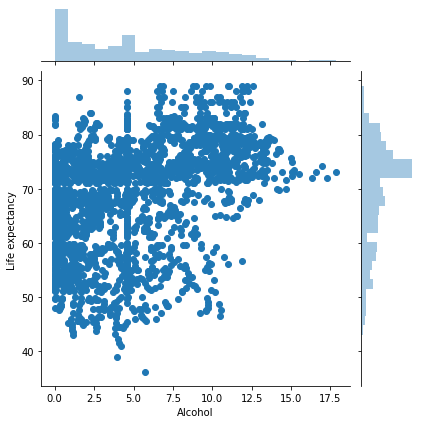

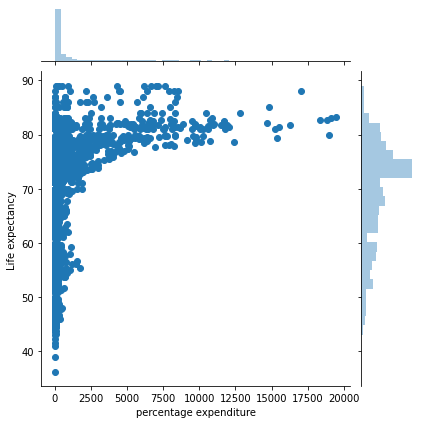

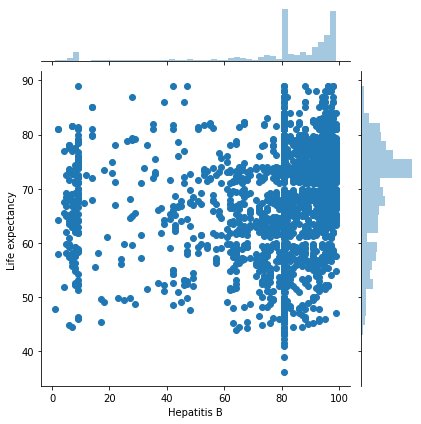

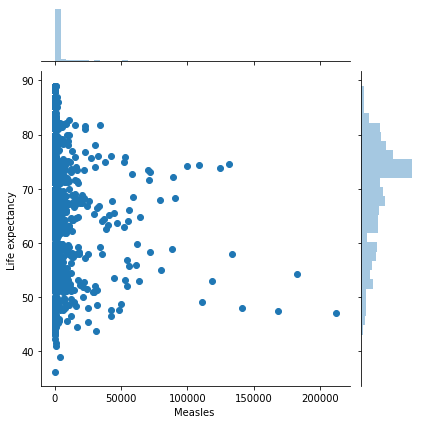

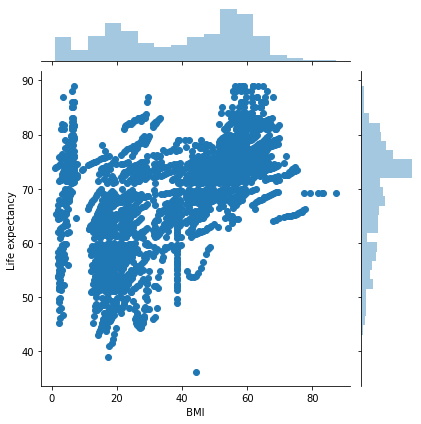

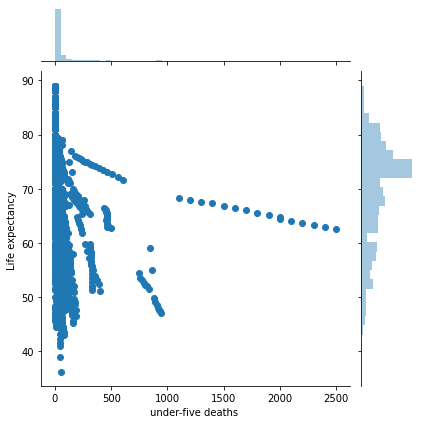

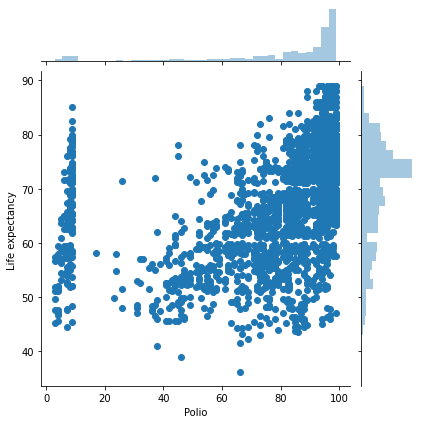

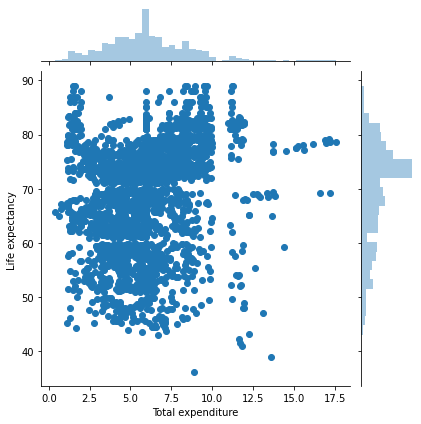

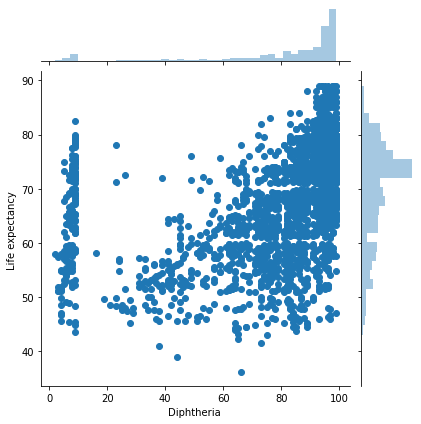

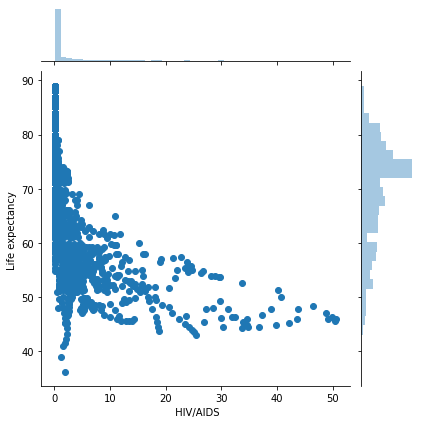

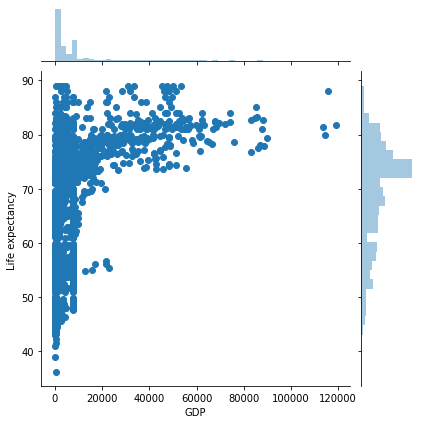

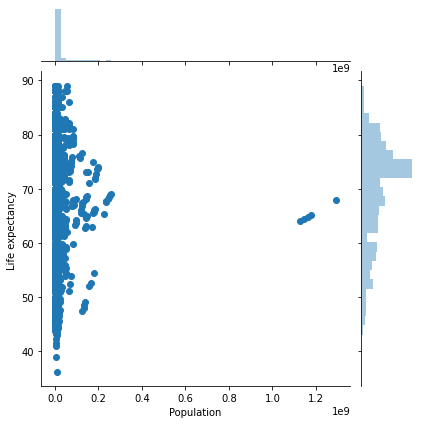

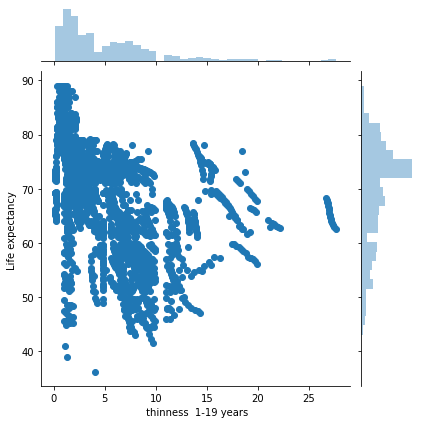

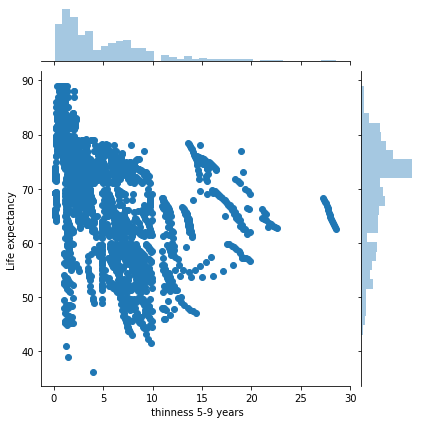

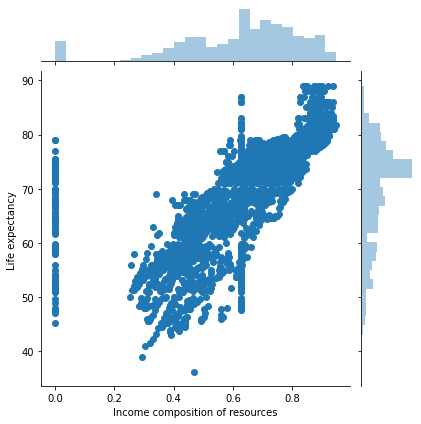

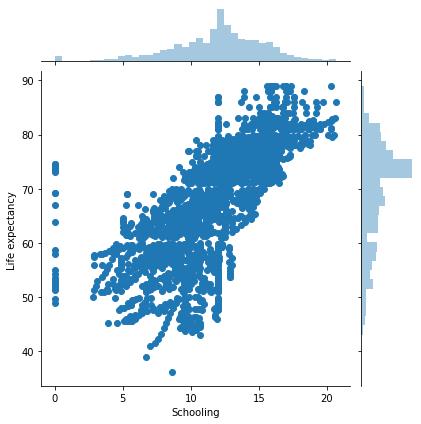

In [82]:
for c in df.columns:
  sns.jointplot(data=df, y="Life expectancy ", x=c)

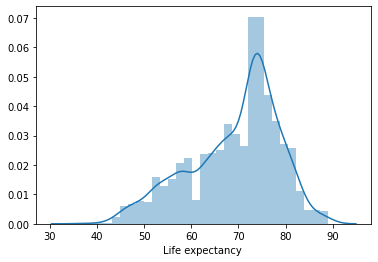

In [83]:
sns.distplot(df['Life expectancy '])

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

y = df.pop('Life expectancy ')
X = df
print(X.head())

   Year  Status  ...  Income composition of resources  Schooling
0  2015       0  ...                            0.479       10.1
1  2014       0  ...                            0.476       10.0
2  2013       0  ...                            0.470        9.9
3  2012       0  ...                            0.463        9.8
4  2011       0  ...                            0.454        9.5

[5 rows x 20 columns]


In [92]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression(fit_intercept=True)
lm.fit(train_x, train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
# W = lm[0]
# b = lm[1]
# print(W,b)
y_pred = lm.predict(test_x)
print(y_pred[:10], test_y[:10])
np.sqrt(np.sum(np.abs(y_pred[:10] - test_y[:10]))/10)

[49.78536603 61.54524653 77.43435644 65.93087427 70.83590838 70.73399366
 72.43088612 77.74290627 64.45232913 79.78574777] 1201    62.5
1628    53.6
1317    83.3
1392    64.3
1308    73.5
1998    72.7
235     68.2
1329    81.1
958     59.7
2511    81.4
Name: Life expectancy , dtype: float64


2.1619680271544683

In [94]:
# W = W.transpose()
W = W.reshape((20,1))
test_x = test_x.reindex()
print(W.shape)
print(test_x.shape)

(20, 1)
(882, 20)


In [88]:
y_pred = np.matmul(test_x.to_numpy(), W) 
# test_x.shape  #reshape(882, 20)
y_pred[:10], test_y[:10]


# test_x.head

(array([[0.3999569 ],
        [3.29267863],
        [0.03640887],
        [0.02290365],
        [0.70661795],
        [0.16701777],
        [0.2522141 ],
        [0.06133169],
        [0.34520568],
        [2.39514576]]), 1201    62.5
 1628    53.6
 1317    83.3
 1392    64.3
 1308    73.5
 1998    72.7
 235     68.2
 1329    81.1
 958     59.7
 2511    81.4
 Name: Life expectancy , dtype: float64)

Text(0, 0.5, 'Predicted Values')

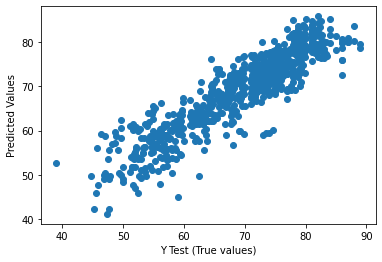

In [99]:
# predictions = lm.predict(test_x)
plt.scatter(test_y, y_pred)
plt.xlabel('Y Test (True values)')
plt.ylabel('Predicted Values')

In [0]:
sns.distplot((test_y - predictions))

In [101]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, y_pred ))
print(metrics.mean_squared_error(test_y, y_pred ))
print(np.sqrt(metrics.mean_squared_error(test_y, y_pred )))
#this variance shows that through our model we are able to explain 82 percent of the variance in the test data, which is decent.
print(metrics.explained_variance_score(test_y, y_pred))

2.961529286980968
15.380243443213057
3.921765347801046
0.8222838123977654
